## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

In [1]:
!conda install -y pytorch torchvision -c pytorch

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |           py38_0         2.8 MB
    ninja-1.10.1               |   py38h879752b_0         103 KB
    pytorch-1.6.0              |          py3.8_0        54.6 MB  pytorch
    torchvision-0.7.0          |         py38_cpu         5.8 MB  pytorch
    ------------------------------------------------------------
                                           Total:        63.3 MB

The following NEW packages will be INSTALLED:

  ninja              pkgs/main/osx-64::ninja-1.10.1-py38h879752b_0
  pytorch            pytorch/osx-64::pytorch-1.6.0-py3.8_0
  torchvision        pytorch/osx-64::torchvision-0.7.0-py38_cpu

The following packages will be UPDATED:

  conda               

## Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [1]:
import numpy as np 
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_boston
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

In [3]:
a = np.random.rand(5, 3) # создали случайную матрицу 
a

array([[0.51699937, 0.83183861, 0.56848679],
       [0.65640085, 0.3401572 , 0.20077412],
       [0.0390321 , 0.57147938, 0.63825747],
       [0.66691078, 0.75606151, 0.36853763],
       [0.80582218, 0.71526771, 0.40915082]])

In [4]:
b = np.random.rand(5, 3) # создали случайную матрицу 
b

array([[0.88208615, 0.84459531, 0.64791103],
       [0.33383157, 0.99140128, 0.751782  ],
       [0.05868584, 0.78513217, 0.18276548],
       [0.44030879, 0.21506761, 0.36259886],
       [0.37197309, 0.48477857, 0.60593113]])

In [5]:
a + b

array([[1.39908552, 1.67643392, 1.21639782],
       [0.99023242, 1.33155849, 0.95255613],
       [0.09771794, 1.35661156, 0.82102295],
       [1.10721956, 0.97112912, 0.73113649],
       [1.17779526, 1.20004629, 1.01508195]])

In [6]:
print("Проверили размеры : %s\n" % (a.shape,))

Проверили размеры : (5, 3)



In [7]:
print("Добавили 5 :\n\n%s\n" % (a + 5))

Добавили 5 :

[[5.51699937 5.83183861 5.56848679]
 [5.65640085 5.3401572  5.20077412]
 [5.0390321  5.57147938 5.63825747]
 [5.66691078 5.75606151 5.36853763]
 [5.80582218 5.71526771 5.40915082]]



In [8]:
print("X*X^T  :\n\n%s\n" % np.dot(a, a.T))

X*X^T  :

[[1.28242105 0.73645216 0.85839913 1.18322238 1.24419369]
 [0.73645216 0.58687925 0.34815912 0.76893339 0.85439272]
 [0.85839913 0.34815912 0.73548479 0.69332639 0.70135725]
 [1.18322238 0.76893339 0.69332639 1.15221898 1.22898535]
 [1.24419369 0.85439272 0.70135725 1.22898535 1.32836167]]



In [9]:
print("Среднее по колонкам :\n%s\n" % (a.sum(axis=0)))

Среднее по колонкам :
[2.68516527 3.21480442 2.18520684]



In [10]:
print("Изменили размеры :\n%s\n" % (a.reshape(-1).shape,))

Изменили размеры :
(15,)



In [11]:
a.reshape(-1)

array([0.51699937, 0.83183861, 0.56848679, 0.65640085, 0.3401572 ,
       0.20077412, 0.0390321 , 0.57147938, 0.63825747, 0.66691078,
       0.75606151, 0.36853763, 0.80582218, 0.71526771, 0.40915082])

In [12]:
print("Изменили размеры :\n%s\n" % (a.reshape(3, 5).shape,))

Изменили размеры :
(3, 5)



In [13]:
a.reshape(3, 5)

array([[0.51699937, 0.83183861, 0.56848679, 0.65640085, 0.3401572 ],
       [0.20077412, 0.0390321 , 0.57147938, 0.63825747, 0.66691078],
       [0.75606151, 0.36853763, 0.80582218, 0.71526771, 0.40915082]])

Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [14]:
a = torch.tensor([1, 2, 3, 4, 5])

In [15]:
a

tensor([1, 2, 3, 4, 5])

In [16]:
x = torch.rand(5, 3)
x

tensor([[0.4716, 0.6311, 0.1031],
        [0.8311, 0.3508, 0.3858],
        [0.2068, 0.7200, 0.4641],
        [0.2495, 0.7290, 0.6010],
        [0.4078, 0.7867, 0.7799]])

In [17]:
print("Проверили размеры : %s\n" % (x.shape,))

Проверили размеры : torch.Size([5, 3])



In [18]:
print("Добавили 5 :\n\n%s\n" % (x + 5))

Добавили 5 :

tensor([[5.4716, 5.6311, 5.1031],
        [5.8311, 5.3508, 5.3858],
        [5.2068, 5.7200, 5.4641],
        [5.2495, 5.7290, 5.6010],
        [5.4078, 5.7867, 5.7799]])



In [19]:
print("X*X^T  (1):\n\n%s\n" % (torch.matmul(x, x.transpose(1, 0))))
print("X*X^T  (2):\n\n%s\n" % (x.mm(x.t())))

X*X^T  (1):

tensor([[0.6313, 0.6531, 0.5997, 0.6397, 0.7692],
        [0.6531, 0.9626, 0.6034, 0.6949, 0.9157],
        [0.5997, 0.6034, 0.7764, 0.8553, 1.0127],
        [0.6397, 0.6949, 0.8553, 0.9549, 1.1440],
        [0.7692, 0.9157, 1.0127, 1.1440, 1.3935]])

X*X^T  (2):

tensor([[0.6313, 0.6531, 0.5997, 0.6397, 0.7692],
        [0.6531, 0.9626, 0.6034, 0.6949, 0.9157],
        [0.5997, 0.6034, 0.7764, 0.8553, 1.0127],
        [0.6397, 0.6949, 0.8553, 0.9549, 1.1440],
        [0.7692, 0.9157, 1.0127, 1.1440, 1.3935]])



In [20]:
print("Среднее по колонкам :\n%s\n" % (x.sum(dim=0)))

Среднее по колонкам :
tensor([2.1668, 3.2176, 2.3338])



In [21]:
x.t().shape

torch.Size([3, 5])

In [22]:
print("Изменили размеры :\n%s\n" % (x.view([3, 5]).shape,))
print("Изменили размеры :\n%s\n" % (x.view_as(x.t()).shape,))

Изменили размеры :
torch.Size([3, 5])

Изменили размеры :
torch.Size([3, 5])



In [23]:
torch.zeros_like(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [24]:
torch.ones_like(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [25]:
torch.rand_like(x)

tensor([[0.5779, 0.7326, 0.2497],
        [0.1507, 0.1015, 0.6330],
        [0.5952, 0.4591, 0.7156],
        [0.0912, 0.0518, 0.6879],
        [0.8799, 0.5646, 0.9461]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype('int64') -> x.type(torch.LongTensor)`

Для помощи есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


## Создаем тензоры в pytorch и снова изучаем базовые операции

In [26]:
x = torch.empty(5, 3) # пустой тензор
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [27]:
x = torch.rand(5, 3) # тензор со случайными числами
print(x)

tensor([[0.1355, 0.2662, 0.7122],
        [0.6541, 0.7624, 0.0697],
        [0.7750, 0.0112, 0.1097],
        [0.5285, 0.9363, 0.4936],
        [0.0800, 0.3837, 0.6336]])


In [28]:
x = torch.zeros(5, 3, dtype=torch.long) # тензор с нулями и указанием типов чисел
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [29]:
x = torch.tensor([5.5, 3]) # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [30]:
x = x.new_ones(5, 3, dtype=torch.double) # используем уже созданный тензор для создания тензора из единичек
print(x, x.size()) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) torch.Size([5, 3])


In [31]:
x = torch.randn_like(x, dtype=torch.float) # создаем матрицу с размерами как у x
print(x, x.size())

tensor([[-1.2669e+00, -1.4241e+00,  2.8539e+00],
        [-1.3680e-01,  1.5619e-03, -1.9444e+00],
        [-3.9261e-01, -9.1937e-02, -5.9189e-01],
        [-2.0316e-01,  2.3286e+00,  8.0450e-01],
        [ 1.7225e+00, -1.1651e+00, -1.9754e-01]]) torch.Size([5, 3])


In [32]:
y = torch.rand(5, 3)
print(x + y) # операция сложения

tensor([[-0.3189, -0.5522,  3.7727],
        [ 0.1922,  0.9495, -1.4180],
        [ 0.4121,  0.2866,  0.0396],
        [ 0.2254,  3.2737,  0.8623],
        [ 2.2019, -0.8511,  0.6092]])


In [33]:
z = torch.add(x, y) # очередная операция сложения
print(z)

tensor([[-0.3189, -0.5522,  3.7727],
        [ 0.1922,  0.9495, -1.4180],
        [ 0.4121,  0.2866,  0.0396],
        [ 0.2254,  3.2737,  0.8623],
        [ 2.2019, -0.8511,  0.6092]])


In [34]:
torch.add(x, y, out=z) # и наконец последний вид
print(z)

tensor([[-0.3189, -0.5522,  3.7727],
        [ 0.1922,  0.9495, -1.4180],
        [ 0.4121,  0.2866,  0.0396],
        [ 0.2254,  3.2737,  0.8623],
        [ 2.2019, -0.8511,  0.6092]])


In [35]:
?torch.add # посмотреть, что функция значит

Object `torch.add # посмотреть, что функция значит` not found.


In [36]:
x

tensor([[-1.2669e+00, -1.4241e+00,  2.8539e+00],
        [-1.3680e-01,  1.5619e-03, -1.9444e+00],
        [-3.9261e-01, -9.1937e-02, -5.9189e-01],
        [-2.0316e-01,  2.3286e+00,  8.0450e-01],
        [ 1.7225e+00, -1.1651e+00, -1.9754e-01]])

In [37]:
x.add_(y) # '_' изменяет исходный тензор 

tensor([[-0.3189, -0.5522,  3.7727],
        [ 0.1922,  0.9495, -1.4180],
        [ 0.4121,  0.2866,  0.0396],
        [ 0.2254,  3.2737,  0.8623],
        [ 2.2019, -0.8511,  0.6092]])

In [38]:
x

tensor([[-0.3189, -0.5522,  3.7727],
        [ 0.1922,  0.9495, -1.4180],
        [ 0.4121,  0.2866,  0.0396],
        [ 0.2254,  3.2737,  0.8623],
        [ 2.2019, -0.8511,  0.6092]])

In [39]:
print(x * y) # поэлементное умножение

tensor([[-0.3024, -0.4815,  3.4663],
        [ 0.0632,  0.9000, -0.7465],
        [ 0.3316,  0.1085,  0.0250],
        [ 0.0966,  3.0938,  0.0498],
        [ 1.0555, -0.2672,  0.4915]])


In [40]:
print(x @ y.t()) # матричное умножение

tensor([[ 2.6824,  1.3577,  1.9165, -0.4406,  2.7174],
        [-0.2928,  0.2168, -0.3813,  0.8978, -0.7537],
        [ 0.6769,  0.4281,  0.4650,  0.4497,  0.3194],
        [ 3.8601,  3.6313,  1.9651,  3.2402,  1.8317],
        [ 1.9051,  0.2384,  1.8343,  0.1745,  1.2797]])


In [41]:
print(x.mm(y.t())) # и опять матричное умножение

tensor([[ 2.6824,  1.3577,  1.9165, -0.4406,  2.7174],
        [-0.2928,  0.2168, -0.3813,  0.8978, -0.7537],
        [ 0.6769,  0.4281,  0.4650,  0.4497,  0.3194],
        [ 3.8601,  3.6313,  1.9651,  3.2402,  1.8317],
        [ 1.9051,  0.2384,  1.8343,  0.1745,  1.2797]])


In [42]:
x

tensor([[-0.3189, -0.5522,  3.7727],
        [ 0.1922,  0.9495, -1.4180],
        [ 0.4121,  0.2866,  0.0396],
        [ 0.2254,  3.2737,  0.8623],
        [ 2.2019, -0.8511,  0.6092]])

In [43]:
x.unsqueeze(0)

tensor([[[-0.3189, -0.5522,  3.7727],
         [ 0.1922,  0.9495, -1.4180],
         [ 0.4121,  0.2866,  0.0396],
         [ 0.2254,  3.2737,  0.8623],
         [ 2.2019, -0.8511,  0.6092]]])

In [44]:
print(x.unsqueeze(0).shape) # добавили измерение в начало, аналог броадкастинга 

torch.Size([1, 5, 3])


In [45]:
x.unsqueeze(0).squeeze(0)

tensor([[-0.3189, -0.5522,  3.7727],
        [ 0.1922,  0.9495, -1.4180],
        [ 0.4121,  0.2866,  0.0396],
        [ 0.2254,  3.2737,  0.8623],
        [ 2.2019, -0.8511,  0.6092]])

In [46]:
print(x.unsqueeze(0).squeeze(0).shape) # убрали измерение в начале, аналог броадкастинга 

torch.Size([5, 3])


In [47]:
a = torch.tensor([1, 2, 3, 4])
a.shape

torch.Size([4])

In [48]:
a

tensor([1, 2, 3, 4])

In [87]:
a[None, None, :]

array([[[1, 2, 3]]])

In [88]:
a[None, None, :].shape

(1, 1, 3)

In [89]:
a.unsqueeze(0).unsqueeze(1)

AttributeError: 'numpy.ndarray' object has no attribute 'unsqueeze'

In [ ]:
a.unsqueeze(0).unsqueeze(1).shape

In [90]:
x = torch.rand(6, 2)
x

tensor([[0.8106, 0.0151],
        [0.0153, 0.6036],
        [0.2318, 0.8633],
        [0.9859, 0.1975],
        [0.0830, 0.4253],
        [0.9149, 0.4799]])

In [91]:
x.view(-1)

tensor([0.8106, 0.0151, 0.0153, 0.6036, 0.2318, 0.8633, 0.9859, 0.1975, 0.0830,
        0.4253, 0.9149, 0.4799])

In [92]:
x.view(3, 4)

tensor([[0.8106, 0.0151, 0.0153, 0.6036],
        [0.2318, 0.8633, 0.9859, 0.1975],
        [0.0830, 0.4253, 0.9149, 0.4799]])

In [93]:
x[:, :, None, None].shape

torch.Size([6, 2, 1, 1])

In [94]:
x[..., None, None].shape

torch.Size([6, 2, 1, 1])

In [95]:
x

tensor([[0.8106, 0.0151],
        [0.0153, 0.6036],
        [0.2318, 0.8633],
        [0.9859, 0.1975],
        [0.0830, 0.4253],
        [0.9149, 0.4799]])

In [96]:
x[:3, :]

tensor([[0.8106, 0.0151],
        [0.0153, 0.6036],
        [0.2318, 0.8633]])

Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [97]:
torch.ones(3, 5)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [98]:
torch.ones(3, 5).numpy()

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [99]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


и наоборот

In [100]:
a = np.array([1, 2, 3])
torch.from_numpy(a)

tensor([1, 2, 3])

Не забываем про то, что дефолтный тип в numpy — это float64, а в pytorch — float32. Второй тип имеет меньшую точность, но требует меньше памяти (с ним нейросеть будет работать быстрее).

## Нелинейности

### ReLU

In [101]:
def relu(x):
    if x > 0:
        return x
    else:
        return 0

В торче есть реализация данной функции.

In [102]:
torch.relu(torch.tensor([-10, 1, 2, -7, 8]))

tensor([0, 1, 2, 0, 8])

In [111]:
x = torch.linspace(-10, 10, 1000)
y = torch.relu(x)

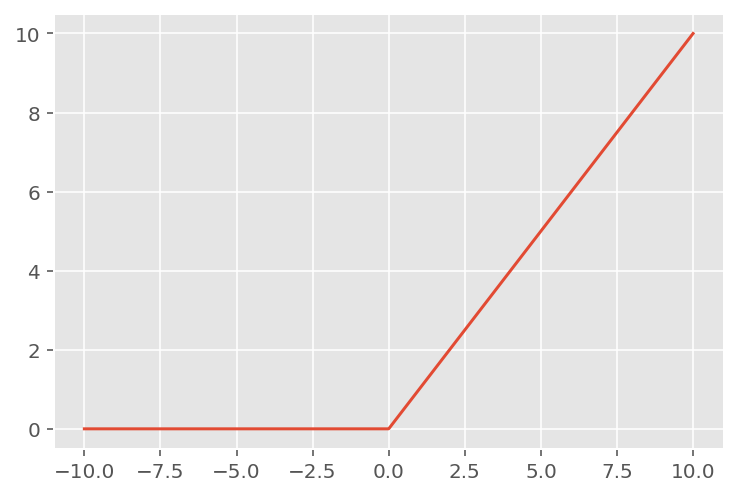

In [113]:
plt.plot(x, y);

Модификация ReLU:

In [114]:
def leaky_relu(x, alpha=0.1):
    if x > 0:
        return x
    else:
        return alpha * x

In [116]:
leaky_relu = nn.LeakyReLU(negative_slope=0.1)

In [119]:
leaky_relu(torch.tensor([-10, 1, 2, -7, 8]).float())

tensor([-1.0000,  1.0000,  2.0000, -0.7000,  8.0000])

In [120]:
x = torch.linspace(-10, 10, 1000)
y = leaky_relu(x)

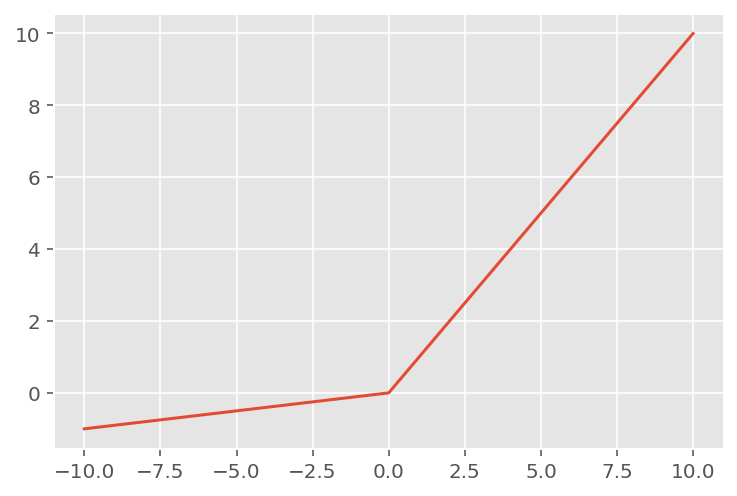

In [121]:
plt.plot(x, y);

Также для борьбы с затуханием градиента есть ELU и SELU

In [139]:
?nn.ELU

In [142]:
elu = nn.ELU(alpha=1)

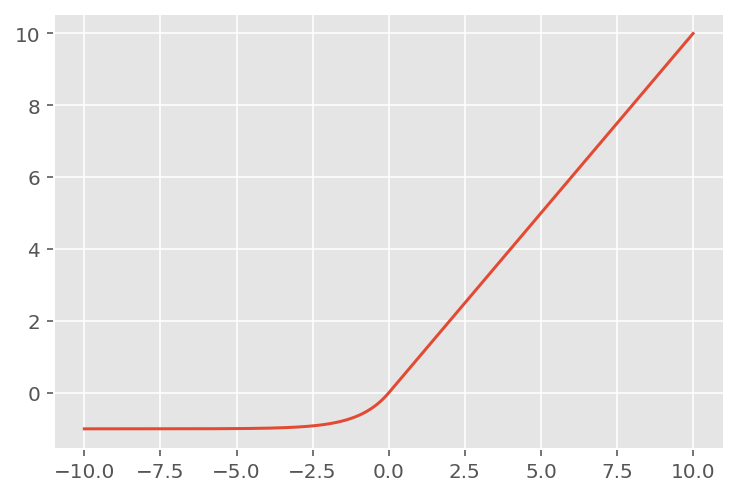

In [143]:
x = torch.linspace(-10, 10, 1000)
y = elu(x)
plt.plot(x, y);

In [145]:
?nn.SELU

In [147]:
selu = nn.SELU()

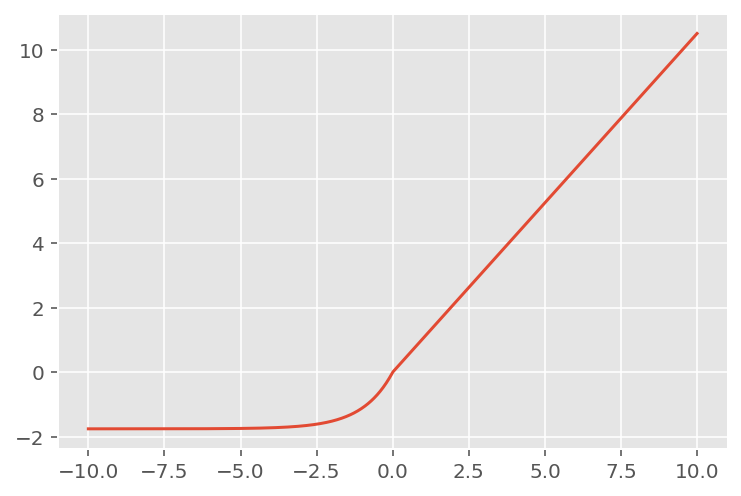

In [148]:
x = torch.linspace(-10, 10, 1000)
y = selu(x)
plt.plot(x, y);

### Сигмойда

In [149]:
def sigmoid(x):
    return 1 / (1 + exp(-x))

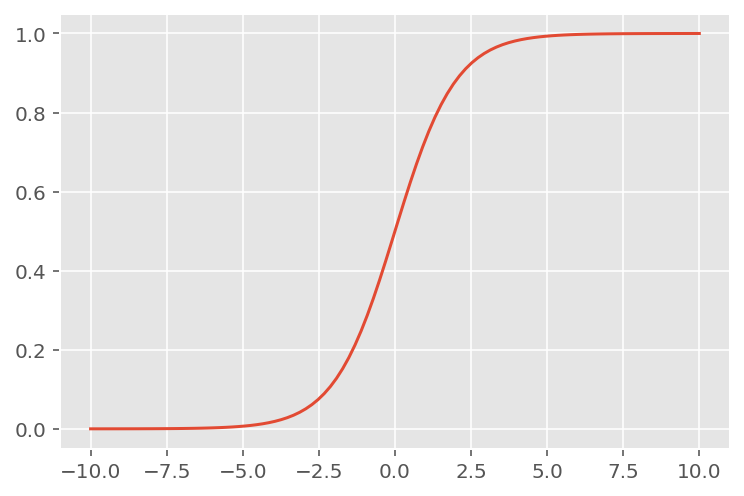

In [152]:
x = torch.linspace(-10, 10, 100)
y = torch.sigmoid(x)
plt.plot(x, y);

Заметим, что сигмоида при аргументе равном нулю не равна нулю. Однако, для хорошего обучения нейросети желательно было бы, чтобы все нелинейности в нуле были равны нулю, поскольку мы зачастую инициализируем веса из нормального распределения с математическим ожиданием ноль.

Тогда обратим внимание на гиперболический тангенс.

In [154]:
def tanh(x):
    return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

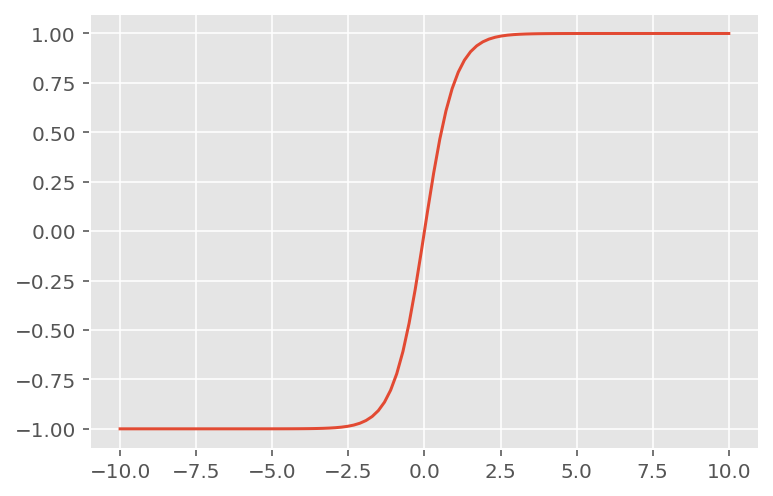

In [155]:
x = torch.linspace(-10, 10, 100)
y = torch.tanh(x)
plt.plot(x, y);

Заметим также, что сигмойда и гиперболический тангенс ограничены, в то время как ReLU и его модификации — нет. Следовательно, с первыми двумя функциями нужно обходиться осторожно.

## Работаем с градиентами руками

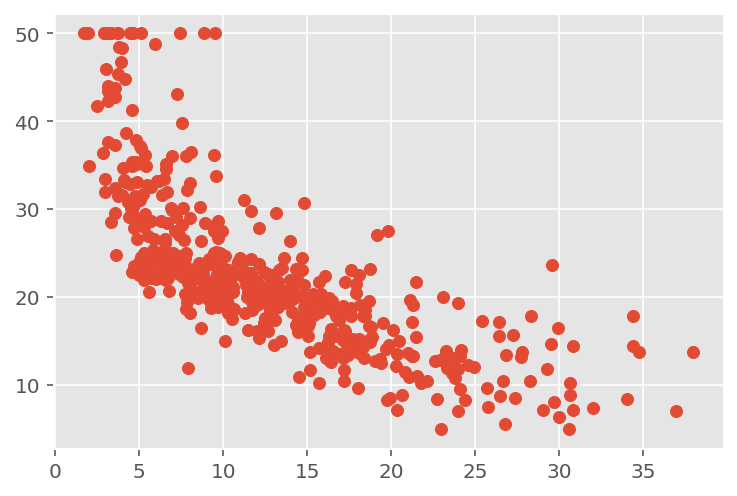

In [72]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.


Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [73]:
torch.manual_seed(13)
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

In [74]:
w, b

(tensor([0.0918], requires_grad=True), tensor([0.4794], requires_grad=True))

In [75]:
x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32) # скейлим признаки для большей устойчивости
y = torch.tensor(boston.target, dtype=torch.float32)

In [76]:
x[:10], y[:10]

(tensor([0.1312, 0.2407, 0.1061, 0.0774, 0.1404, 0.1372, 0.3274, 0.5043, 0.7883,
         0.4504]),
 tensor([24.0000, 21.6000, 34.7000, 33.4000, 36.2000, 28.7000, 22.9000, 27.1000,
         16.5000, 18.9000]))

In [77]:
# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [78]:
y_pred = w * x + b # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y)**2) # MSE

In [79]:
loss

tensor(569.6588, grad_fn=<MeanBackward0>)

In [80]:
loss.backward() # считаем градиенты

In [81]:
# сделали операции и посчитали градиенты, значение должно было появится
assert w.grad is not None
assert b.grad is not None

In [82]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-12.1244])
dL/db = 
 tensor([-44.0457])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут .data:

In [83]:
w.data

tensor([0.0918])

In [84]:
w.grad.data

tensor([-12.1244])

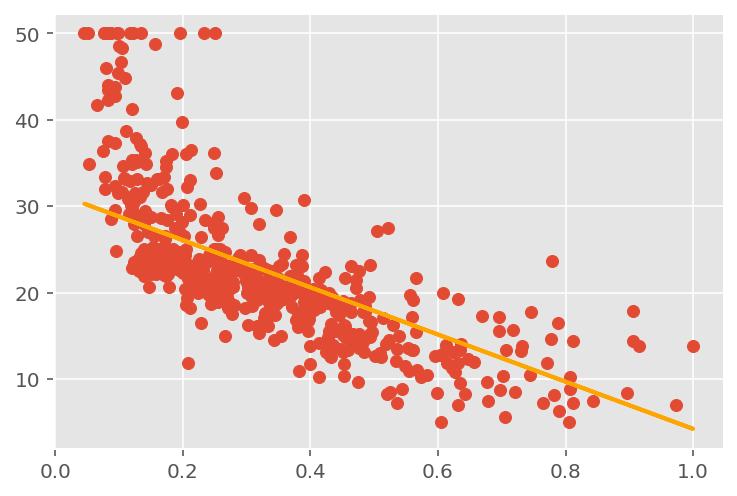

loss =  41.205544


In [85]:
from IPython.display import clear_output

for i in range(500):

    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с eta (learning rate) = .05
    lr = 0.05
    w.data -= lr * w.grad.data
    b.data -= lr * b.grad.data

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их 
    # (если не обнулять их, то градиенты будут суммироваться)
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=2)
        plt.show()

        print("loss = ", loss.data.numpy())

### Попробуем заменить линейную регрессию на трехслойную нейросеть с ReLU активацией по середине

In [183]:
torch.manual_seed(13)

# С помощью первого слоя один признак преобразуем в десять
w_1 = torch.rand((1, 10), requires_grad=True) 
b_1 = torch.rand(10, requires_grad=True)

# С помощью второго слоя десять признаков преобразуем в десять
w_2 = torch.rand((10, 10), requires_grad=True)
b_2 = torch.rand(10, requires_grad=True)

# С помощью третьего десять признаков преобразуем в одно
w_3 = torch.rand((10, 1), requires_grad=True)
b_3 = torch.rand(1, requires_grad=True)

In [184]:
x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32) # скейлим признаки для большей устойчивости
y = torch.tensor(boston.target, dtype=torch.float32)

Функция для подсчета трехслойной нейросети, с ReLU по середине:

In [185]:
def simple_nn(x):
    return (torch.relu((torch.relu(x[:, None] @ w_1 + b_1)) @ w_2 + b_2) @ w_3 + b_3).squeeze(-1)

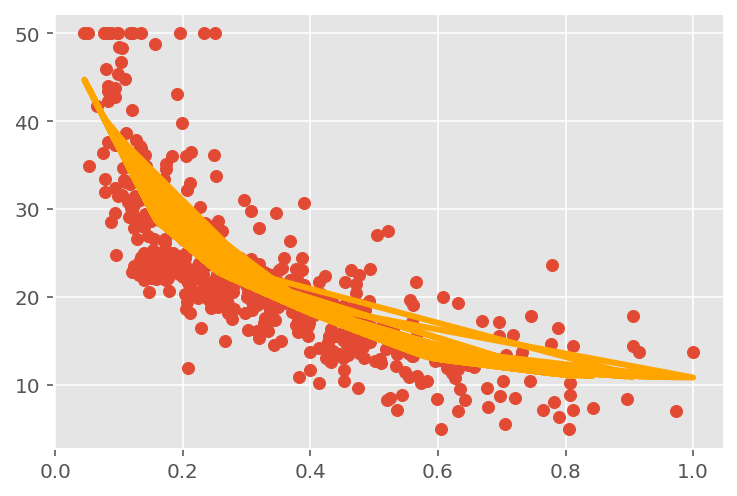

loss =  26.944157


In [190]:
from IPython.display import clear_output

for i in range(500):

    y_pred = simple_nn(x)
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с eta (learning rate) = .001
    lr = .001
    w_1.data -= lr * w_1.grad.data
    b_1.data -= lr * b_1.grad.data
    w_2.data -= lr * w_2.grad.data
    b_2.data -= lr * b_2.grad.data
    w_3.data -= lr * w_3.grad.data
    b_3.data -= lr * b_3.grad.data

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их 
    # (если не обнулять их, то градиенты будут суммироваться)
    w_1.grad.data.zero_()
    b_1.grad.data.zero_()
    w_2.grad.data.zero_()
    b_2.grad.data.zero_()
    w_3.grad.data.zero_()
    b_3.grad.data.zero_()

    y_grid = simple_nn(x)
    
    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=3)
        plt.show()

        print("loss = ", loss.data.numpy())

## Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросеть в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и вставлять их в нейросеть
2. Как сделать нейросеть
3. Как написать цикл обучения

### Как формировать батчи и вставлять их в нейросеть

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования — например, аугментации, о которых вы узнаете позже, — нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса должно быть два метода: 

* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета возьмем данные с прошлой части.

In [191]:
class BostonDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.x =  torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
        self.y = torch.tensor(boston.target, dtype=torch.float32)
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {'x': x[idx], 'y': y[idx]}

In [192]:
dataset = BostonDataset()

In [193]:
dataset.__getitem__(0)

{'x': tensor(0.1312), 'y': tensor(24.)}

либо

In [86]:
class RandomDataset(torch.utils.data.Dataset):
    """Our random dataset"""
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {'sample': torch.tensor(x[idx, :], dtype=torch.float), 'target': y[idx]}

In [87]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [88]:
our_dataset = RandomDataset(x, y)

In [89]:
our_dataset.__getitem__(1)

{'sample': tensor([0.5533, 0.6565, 0.9028, 0.1992, 0.9571]),
 'target': 0.4002039472761384}

In [90]:
our_dataset[1]

{'sample': tensor([0.5533, 0.6565, 0.9028, 0.1992, 0.9571]),
 'target': 0.4002039472761384}

In [91]:
our_dataset.__len__()

1000

In [92]:
len(our_dataset)

1000

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер (итератор по данным), который принимает на вход класс унаследованный от  `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [93]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

In [94]:
for batch in dataloader:
    print(batch)
    break

{'sample': tensor([[0.8253, 0.0964, 0.6261, 0.6892, 0.3507],
        [0.5533, 0.6565, 0.9028, 0.1992, 0.9571],
        [0.0642, 0.0346, 0.0301, 0.9769, 0.3923],
        [0.5739, 0.7712, 0.7862, 0.8457, 0.3817]]), 'target': tensor([0.3261, 0.4002, 0.3139, 0.1515], dtype=torch.float64)}


In [95]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=8)

In [96]:
for batch in dataloader:
    print(batch)
    break

{'sample': tensor([[0.8253, 0.0964, 0.6261, 0.6892, 0.3507],
        [0.5533, 0.6565, 0.9028, 0.1992, 0.9571],
        [0.0642, 0.0346, 0.0301, 0.9769, 0.3923],
        [0.5739, 0.7712, 0.7862, 0.8457, 0.3817],
        [0.9467, 0.8586, 0.0996, 0.5230, 0.5407],
        [0.1414, 0.4915, 0.3734, 0.1673, 0.4547],
        [0.5111, 0.5464, 0.8633, 0.7414, 0.9499],
        [0.6290, 0.6619, 0.1393, 0.6710, 0.1807]]), 'target': tensor([0.3261, 0.4002, 0.3139, 0.1515, 0.9977, 0.7805, 0.7166, 0.8892],
       dtype=torch.float64)}


Работают с ним следующим образом:

In [97]:
for batch in dataloader:
    batch_x = batch['sample']
    batch_y = batch['target']
    break
print('Sample:', batch_x)
print('Target:', batch_y)

Sample: tensor([[0.8253, 0.0964, 0.6261, 0.6892, 0.3507],
        [0.5533, 0.6565, 0.9028, 0.1992, 0.9571],
        [0.0642, 0.0346, 0.0301, 0.9769, 0.3923],
        [0.5739, 0.7712, 0.7862, 0.8457, 0.3817],
        [0.9467, 0.8586, 0.0996, 0.5230, 0.5407],
        [0.1414, 0.4915, 0.3734, 0.1673, 0.4547],
        [0.5111, 0.5464, 0.8633, 0.7414, 0.9499],
        [0.6290, 0.6619, 0.1393, 0.6710, 0.1807]])
Target: tensor([0.3261, 0.4002, 0.3139, 0.1515, 0.9977, 0.7805, 0.7166, 0.8892],
       dtype=torch.float64)


### Как сделать нейросеть

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса должно быть метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` — функций активаций.

In [103]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        # вызываем конструктор родительского класса
        super(NeuralNetwork, self).__init__()
        self.w = nn.Parameter(torch.rand(1))
        self.b = nn.Parameter(torch.rand(1))
    
    def forward(self, x): # пишем, как вычисляется модуль при прогонке нейросети
        return self.w * x + self.b

In [104]:
lin_reg = NeuralNetwork()

In [105]:
list(lin_reg.parameters())

[Parameter containing:
 tensor([0.0411], requires_grad=True),
 Parameter containing:
 tensor([0.2441], requires_grad=True)]

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [106]:
model = nn.Sequential() # создаем пустую модель, в которую будем добавлять слои
model.add_module('h1', nn.Linear(5, 3)) # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module('h2', nn.ReLU()) # добавили функцию активации
model.add_module('h3', nn.Linear(in_features=3, out_features=1)) # добавили слой с 3-мя нейронами на вход и 1-й на выход

In [107]:
model

Sequential(
  (h1): Linear(in_features=5, out_features=3, bias=True)
  (h2): ReLU()
  (h3): Linear(in_features=3, out_features=1, bias=True)
)

In [109]:
y_pred = model(batch_x) # получили предсказания модели

In [110]:
y_pred.shape

torch.Size([8, 1])

## Как написать цикл обучения
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [205]:
plt.style.use('default')

In [194]:
mnist_train = torchvision.datasets.MNIST(
    './mnist/', train=True, download=True, 
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для обучения

mnist_val = torchvision.datasets.MNIST(
    './mnist/', train=False, download=True,
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для валидации

train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер
  # num_workers=1 означает, что это будет происходить в один поток, чтобы не нагружать CPU, наш процессор

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=True, num_workers=1
)

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...


/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1595629449223/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [206]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [207]:
image, class_ = mnist_train.__getitem__(0)

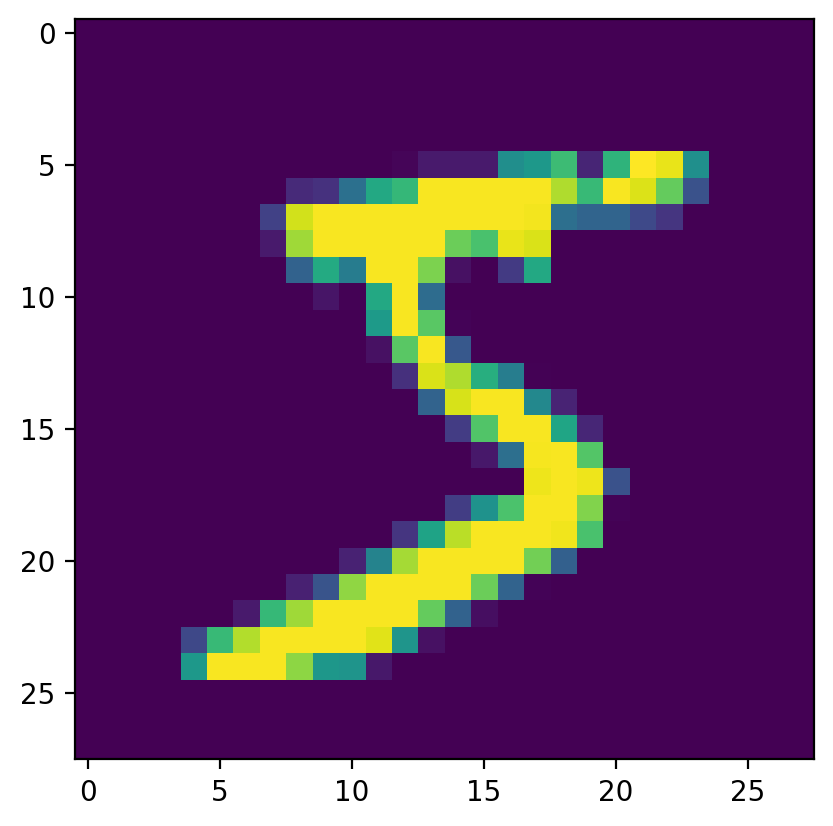

In [208]:
plt.imshow(image.numpy().squeeze(0))

In [210]:
class_

5

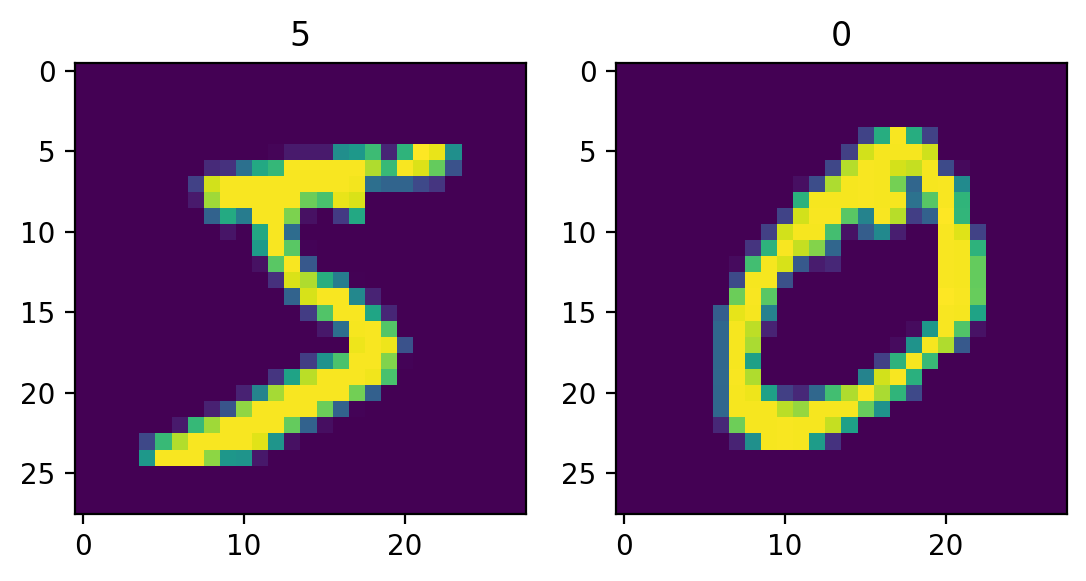

In [209]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

Обучим нейросеть, в которой будет два слоя и которая будет предсказывать класс картинки.

In [217]:
model = nn.Sequential(
    nn.Flatten(), # превращаем картинку 28x28 в вектор размером 784
    nn.Linear(784, 128), # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(), # функция активации релу
    nn.Linear(128, 10), # входной слой размером 128 нейронов с выходом в 10 нейронов
    nn.Softmax(dim=-1) # софтмакс для получения вероятностного распределения над метками класса
)

# вместо того, чтобы прописывать градиентный спуск ручками, можем использовать:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # создаем оптимизатор и передаем туда параметры модели

In [218]:
image.shape

torch.Size([1, 28, 28])

In [219]:
nn.Flatten()(image).shape

torch.Size([1, 784])

Веса моделей хранятся в виде матриц и выглядят так:

In [220]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[ 4.3484e-03, -1.1737e-02,  4.3178e-03,  ..., -1.2392e-02,
            3.0877e-02, -2.8932e-02],
          [ 1.6683e-02,  1.2595e-02, -1.7773e-02,  ..., -1.3434e-02,
           -1.1170e-02,  1.6429e-02],
          [-1.4137e-03,  2.9849e-02, -2.4413e-02,  ..., -2.4422e-02,
           -3.8532e-03, -7.4305e-05],
          ...,
          [ 3.5329e-02, -2.3941e-02, -1.9068e-02,  ...,  1.2300e-02,
            2.8034e-02,  1.9858e-02],
          [ 7.2949e-03, -6.9142e-03, -6.9383e-03,  ...,  3.5403e-02,
            8.2309e-03, -3.5415e-02],
          [-2.0074e-02, -3.1723e-02, -1.1528e-02,  ...,  1.2379e-02,
            3.0222e-02, -2.7005e-02]], requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0063, -0.0338, -0.0018,  0.0182, -0.0124, -0.0186, -0.0064,  0.0355,
          -0.0022, -0.0062,  0.0121, -0.0015, -0.0284, -0.0091,  0.0260, -0.0284,
          -0.0034, -0.0251, -0.0117, -0.0070, -0.0160, -0.0183,  0.0282, -0.0354,


In [221]:
criterion = nn.CrossEntropyLoss()

for epoch in range(10): # всего у нас будет 10 эпох (10 раз подряд пройдемся по всем батчам из трейна)
    for x_train, y_train in tqdm(train_dataloader): # берем батч из трейн лоадера
        y_pred = model(x_train) # делаем предсказания
        loss = criterion(y_pred, y_train) # считаем лосс
        loss.backward() # считаем градиенты обратным проходом
        optimizer.step() # обновляем параметры сети: делаем шаг в стохастическом градиентном спуске (SGD)
        optimizer.zero_grad() # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        mean_val_loss = [] # сюда будем складывать средний лосс по батчам
        val_accuracy = []
        with torch.no_grad(): # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader): # берем батч из вал лоадера
                y_pred = model(x_val) # делаем предсказания
                loss = criterion(y_pred, y_val) # считаем лосс
                mean_val_loss.append(loss.numpy()) # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        print('Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}'.format(
                epoch=epoch, loss=np.mean(mean_val_loss), accuracy=np.mean(val_accuracy)
        )) # выводим статистику
    


Epoch: 0, loss: 1.5368866920471191, accuracy: 0.9306



Epoch: 2, loss: 1.508660912513733, accuracy: 0.9554



Epoch: 4, loss: 1.4992808103561401, accuracy: 0.9647



Epoch: 6, loss: 1.4941277503967285, accuracy: 0.9693



Epoch: 8, loss: 1.4902211427688599, accuracy: 0.9733


In [227]:
img, cl = mnist_val.__getitem__(777)

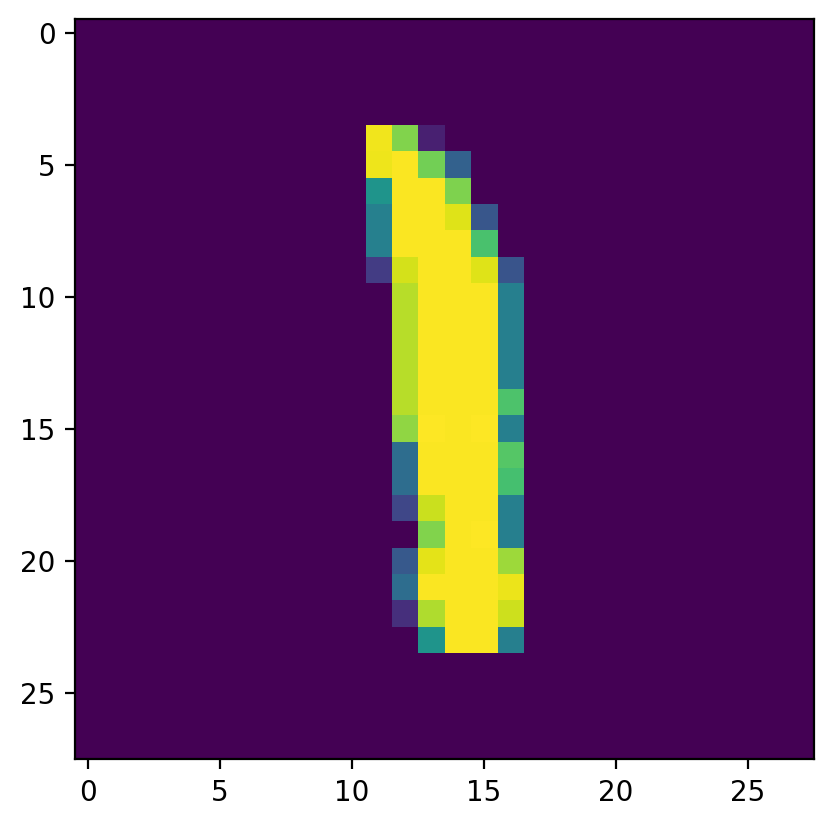

In [228]:
plt.imshow(img.numpy()[0])

In [229]:
cl

1

Получаем вероятности:

In [230]:
out = model(img)
out

tensor([[1.7299e-20, 1.0000e+00, 2.9659e-10, 1.3777e-08, 3.8102e-09, 8.0739e-13,
         7.8162e-12, 1.6483e-11, 2.9952e-06, 1.9531e-11]],
       grad_fn=<SoftmaxBackward>)

### Дополнительные материалы:

* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)